# DATA VISIALUZATION OF 'INDIAN PREMIER LEAGUE' MATCHES

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matches=pd.read_excel('matches.xlsx')

In [3]:
matches['date']=pd.to_datetime(matches['date'])

In [4]:
matches=matches.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant', 'Pune Warriors': 'Rising Pune Supergiant', 'Delhi Daredevils': 'Delhi Capitals', 'Deccan Chargers': 'Sunrisers Hyderabad' })

# WHICH TEAMS HAVE WON THE HIGEST NUMBER OF MATCHES

Text(0.5, 0, 'No. of matches')

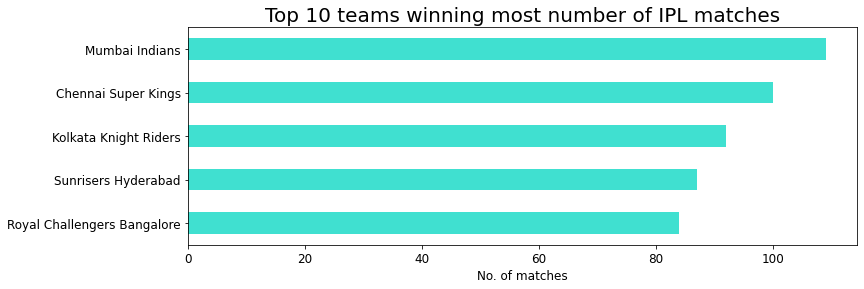

In [5]:
matches['winner'].value_counts().sort_values(ascending=False).head(5).iloc[::-1].plot(kind='barh', figsize=(12,4), color='turquoise')
plt.title('Top 10 teams winning most number of IPL matches', {'fontsize':20})
plt.xlabel('No. of matches')


# Which players have won the most number of 'Man of the Match' tropies

In [6]:
df=matches.groupby('winner')['player_of_match'].value_counts()
df1=pd.DataFrame(df)
df1=df1.rename(columns={'player_of_match': 'no_matches'})
df1=df1.reset_index()
df1=df1[df1['no_matches']>=10].sort_values(by='no_matches')
df1=df1.set_index(['winner', 'player_of_match'])


Text(0.5, 0, 'No. of matches')

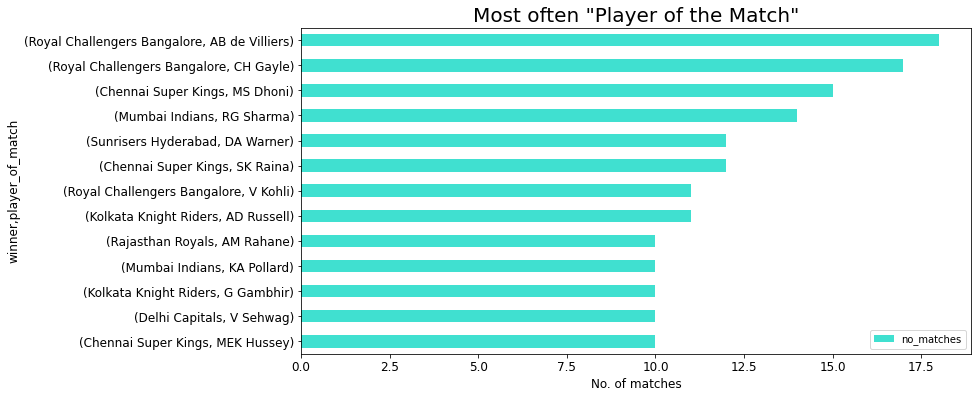

In [7]:
df1.plot(kind='barh', figsize=(12,6), color=['turquoise','blue'])
plt.title('Most often "Player of the Match"', {'fontsize':20})
plt.xlabel('No. of matches')

In [8]:
win_by_runs=matches.groupby(['winner', 'season'])['win_by_runs'].mean()
win_by_runs= win_by_runs.reset_index()
win_by_runs

,winner,season,win_by_runs
0,Chennai Super Kings,2008,8.111111
1,Chennai Super Kings,2009,32.750000
2,Chennai Super Kings,2010,18.000000
3,Chennai Super Kings,2011,19.727273
4,Chennai Super Kings,2012,22.100000
...,...,...,...
95,Sunrisers Hyderabad,2015,10.857143
96,Sunrisers Hyderabad,2016,12.181818
97,Sunrisers Hyderabad,2017,16.125000
98,Sunrisers Hyderabad,2018,7.400000


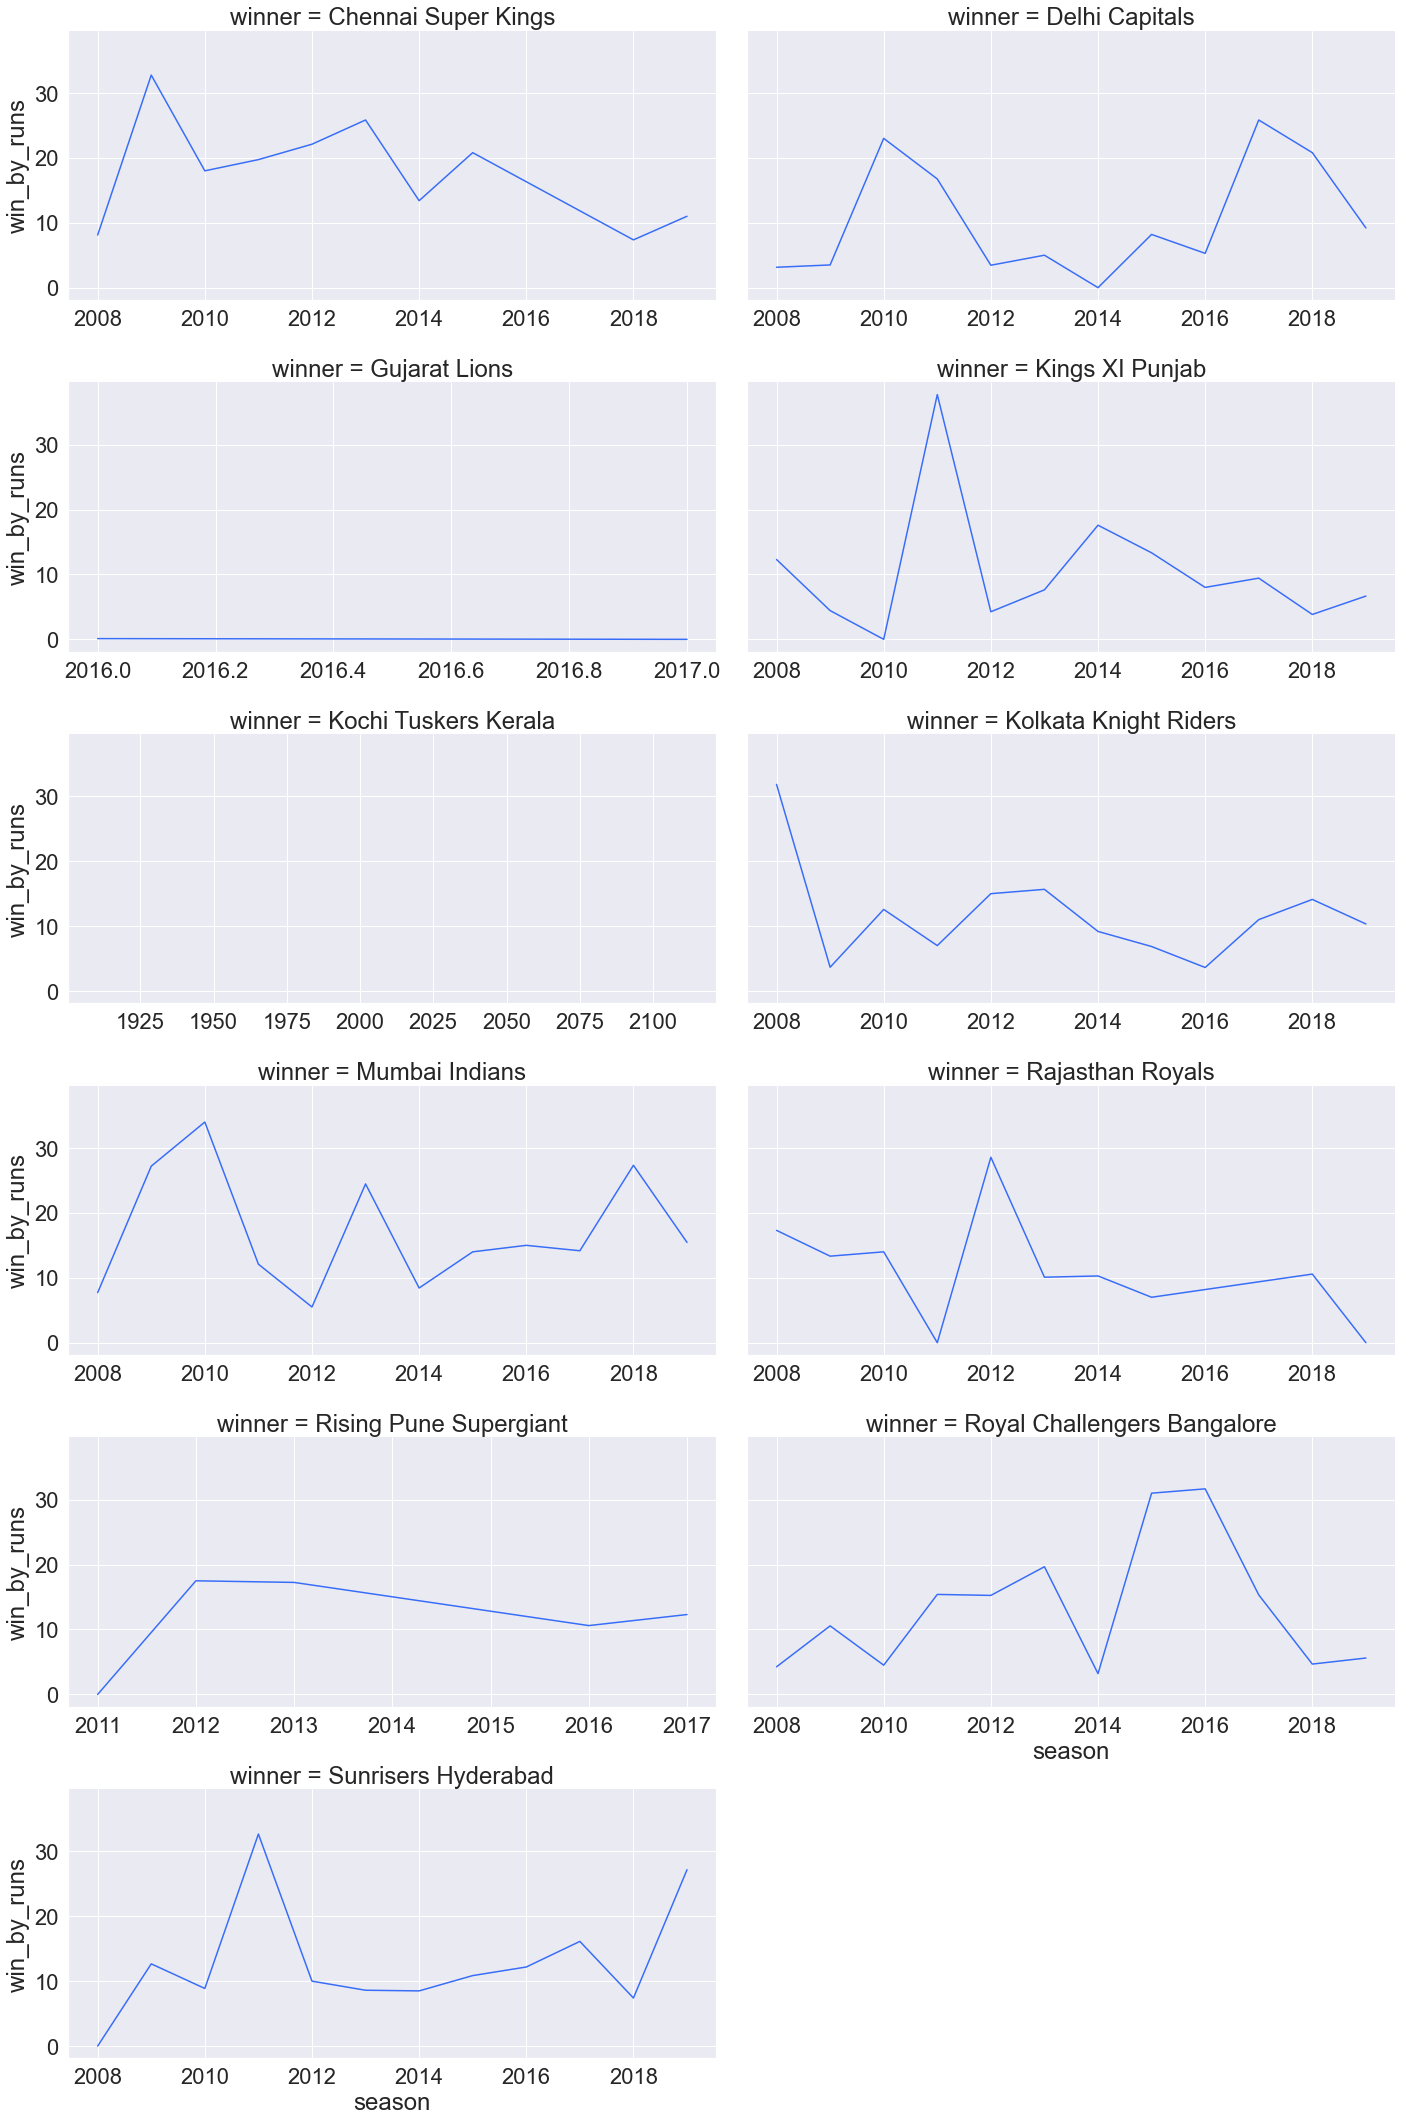

In [9]:
sns.set(context='notebook',
    style='darkgrid',
    palette='rainbow',font_scale=2)  
g = sns.FacetGrid(win_by_runs, col='winner', col_wrap=2, sharey=True,sharex=False, height=5, aspect=2 )
g.map(sns.lineplot, 'season', 'win_by_runs')
# reduce aspect to get sharp and clear individual plots

In [10]:
win_by_wickets=matches.groupby(['winner', 'season'])['win_by_wickets'].mean()
win_by_wickets= win_by_wickets.reset_index()
win_by_wickets

,winner,season,win_by_wickets
0,Chennai Super Kings,2008,3.222222
1,Chennai Super Kings,2009,1.750000
2,Chennai Super Kings,2010,2.777778
3,Chennai Super Kings,2011,2.000000
4,Chennai Super Kings,2012,3.000000
...,...,...,...
95,Sunrisers Hyderabad,2015,1.142857
96,Sunrisers Hyderabad,2016,3.454545
97,Sunrisers Hyderabad,2017,3.000000
98,Sunrisers Hyderabad,2018,3.100000


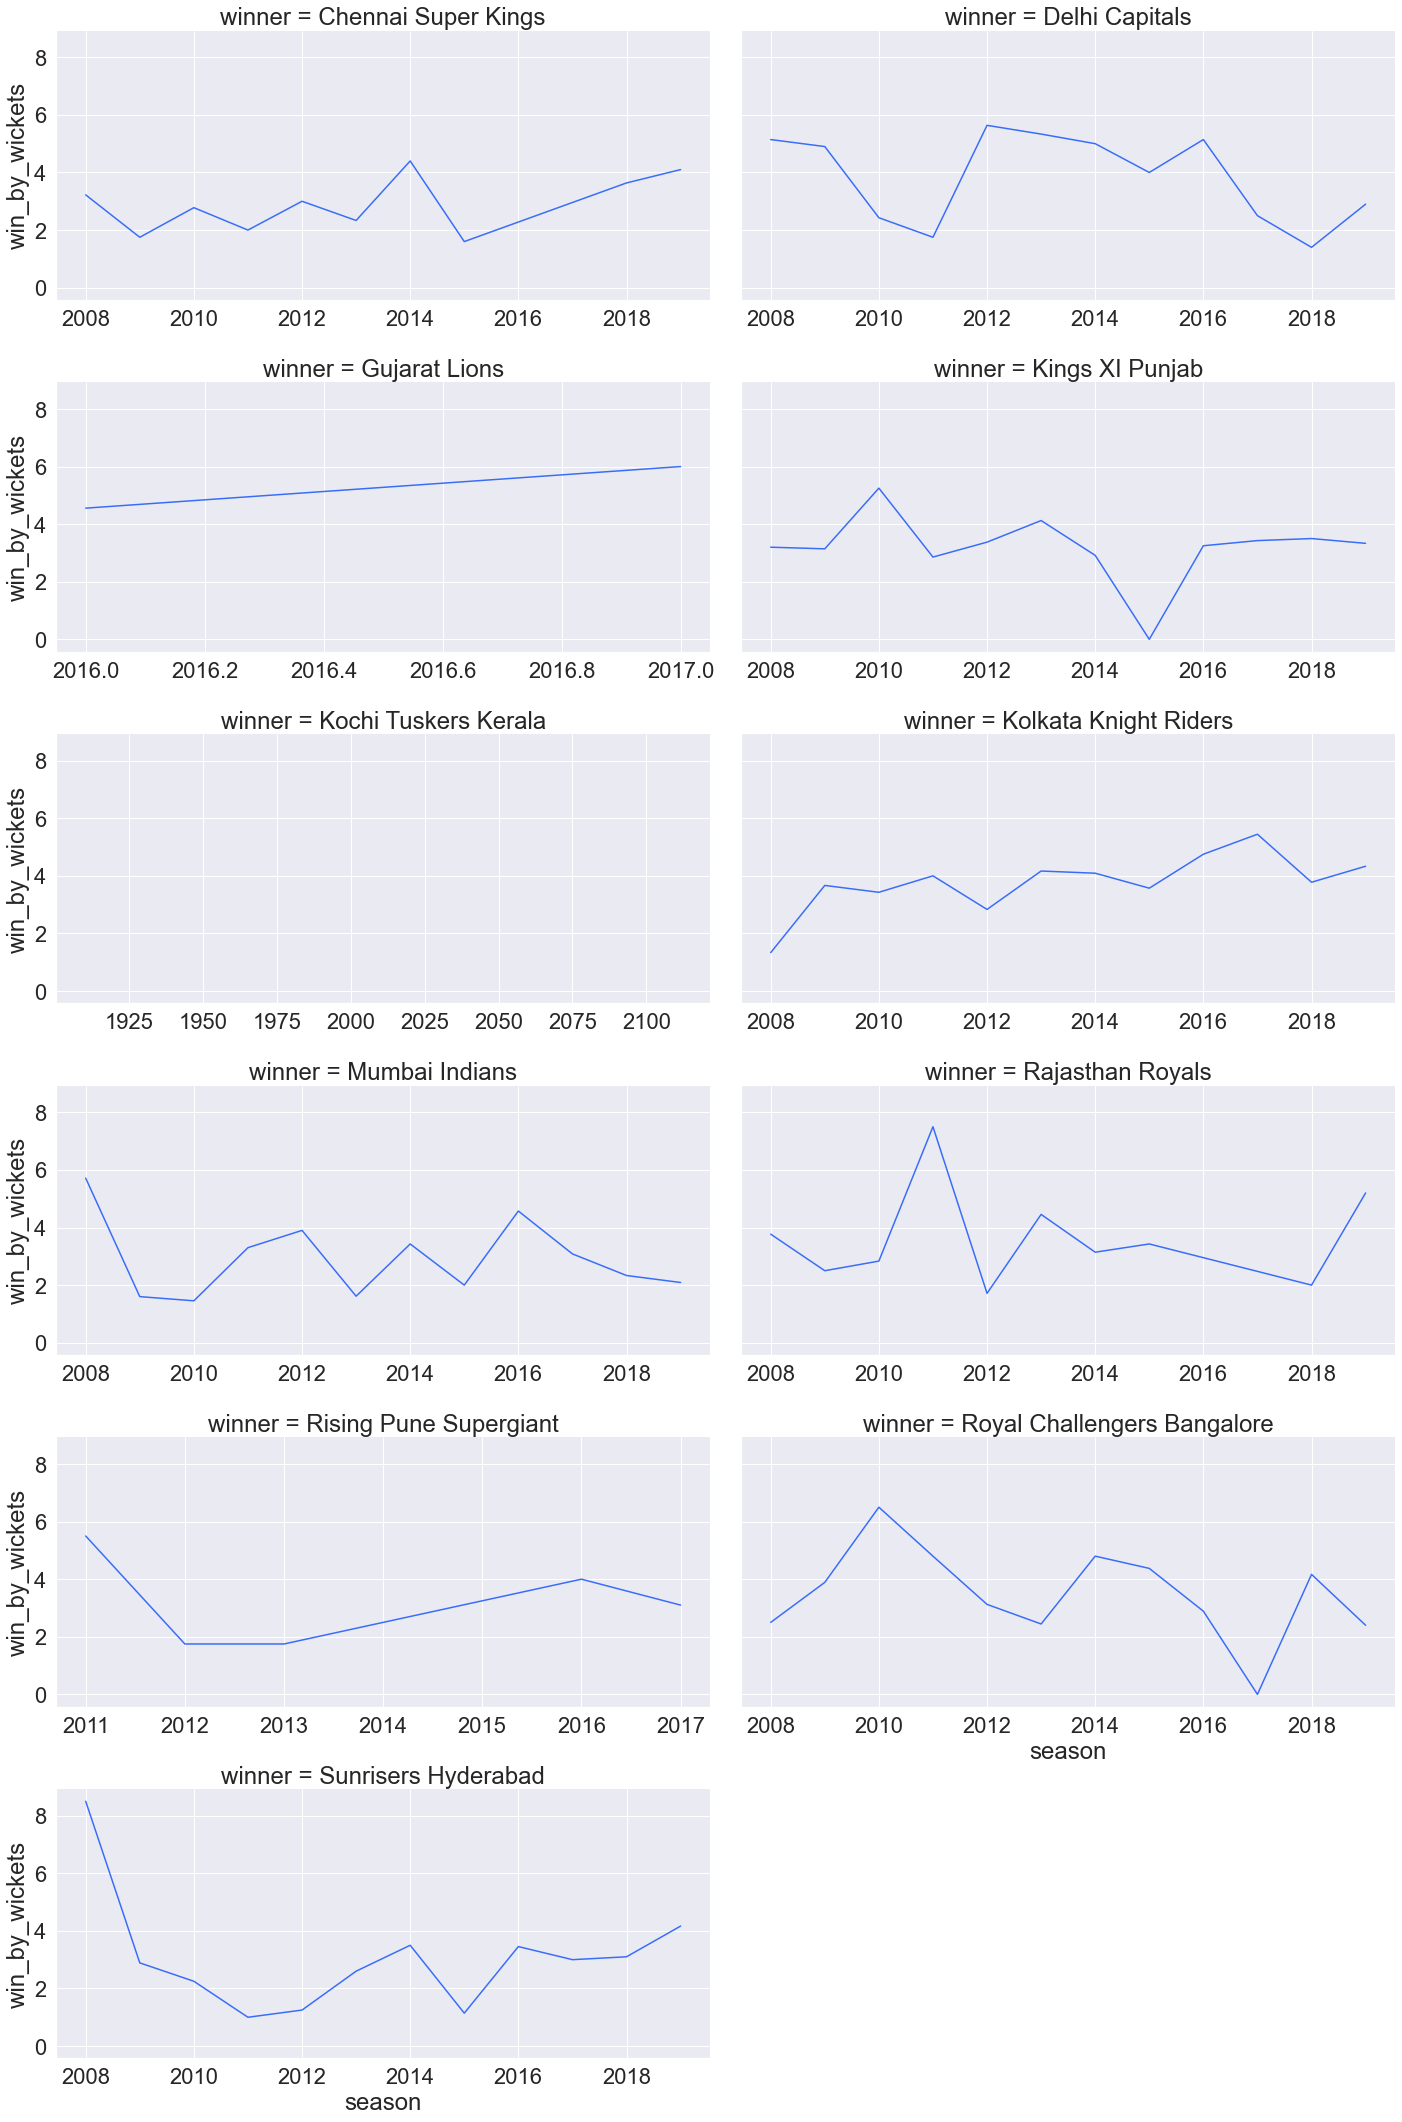

In [11]:
sns.set(context='notebook',
    style='darkgrid',
    palette='rainbow',font_scale=2)  
g = sns.FacetGrid(win_by_wickets, col='winner', col_wrap=2,sharex=False, sharey=True, height=5, aspect=2 )
g.map(sns.lineplot, 'season', 'win_by_wickets')
# reduce aspect to get sharp and clear individual plots

# Performance of  IPL teams- Runs

In [12]:
df=pd.read_excel('deliveries.xlsx')

In [13]:
df1=df[['batting_team','match_id','total_runs']].groupby(['match_id','batting_team']).sum().reset_index()
df1=df1.merge(matches[['id', 'winner']], right_on='id', left_on='match_id', how='left').drop_duplicates()
df1=df1[df1['winner']==df1['batting_team']]


In [14]:
df2=df1[['batting_team', 'total_runs']].groupby('batting_team').max().rename(columns={'total_runs': 'max_runs'}).join(df1[['batting_team', 'total_runs']].groupby('batting_team').mean().rename(columns={'total_runs': 'mean_runs'}))
df2

,max_runs,mean_runs
batting_team,,
Chennai Super Kings,246,167.300000
Delhi Capitals,219,178.900000
Gujarat Lions,196,167.076923
Kings XI Punjab,232,165.487805
Kochi Tuskers Kerala,184,141.000000
Kolkata Knight Riders,250,158.021739
Mumbai Indians,230,166.275229
Rajasthan Royals,231,162.840000
Rising Pune Supergiant,187,155.700000


Text(0.5, 0, 'Runs')

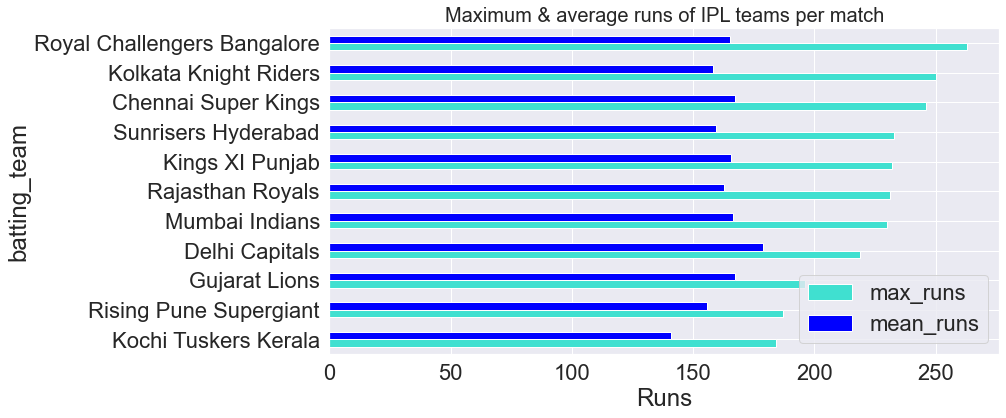

In [15]:
view1=df2.sort_values(by='max_runs')
view1.plot(kind='barh', figsize=(12,6), color=['turquoise','blue'])
plt.title('Maximum & average runs of IPL teams per match', {'fontsize':20})
plt.xlabel('Runs')

## Scoring patterns of IPL teams

Text(0.5, 0, 'Runs')

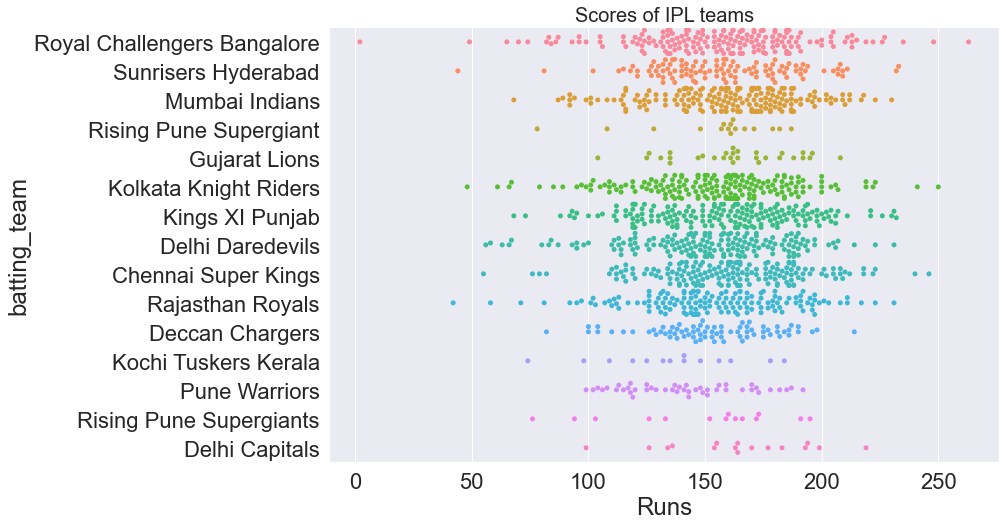

In [16]:
import seaborn as sns

view1=view1.reset_index()
plt.figure(figsize=(12,8))
view3=df[['batting_team','match_id','total_runs']].groupby(['match_id','batting_team']).sum().reset_index()
sns.swarmplot(view3['total_runs'], view3['batting_team'], data=view3)
plt.title('Scores of IPL teams', {'fontsize':20})
plt.xlabel('Runs')

# Performance of  IPL teams- Wickets

In [17]:
df1=df[['batting_team','match_id','dismissal_kind']].groupby(['match_id','batting_team']).count().reset_index()
df1=df1.merge(matches[['id', 'winner']], right_on='id', left_on='match_id', how='left').drop_duplicates()
view2=df1[['batting_team', 'dismissal_kind']].groupby('batting_team').sum().rename(columns={'dismissal_kind': 'total_wickets'}).join(df1[['batting_team', 'dismissal_kind']].groupby('batting_team').mean().rename(columns={'dismissal_kind': 'mean_wickets'}))
view2

,total_wickets,mean_wickets
batting_team,,
Chennai Super Kings,852,5.195122
Deccan Chargers,484,6.453333
Delhi Capitals,106,6.625000
Delhi Daredevils,951,5.906832
Gujarat Lions,188,6.266667
Kings XI Punjab,1081,6.142045
Kochi Tuskers Kerala,86,6.142857
Kolkata Knight Riders,1012,5.685393
Mumbai Indians,1117,5.973262


Text(0.5, 0, 'No. of wickets')

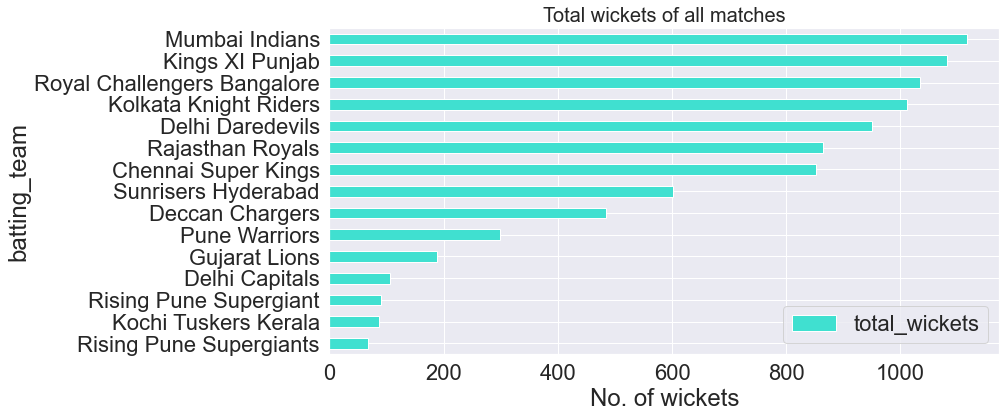

In [18]:
view2=view2.sort_values(by='total_wickets')
view2[['total_wickets']].plot(kind='barh', figsize=(12,6), color=['turquoise','blue'])
plt.title('Total wickets of all matches', {'fontsize':20})
plt.xlabel('No. of wickets')

# Players performance - Runs

In [19]:
df1=df[['batsman','match_id','batsman_runs']].groupby(['match_id','batsman']).sum().reset_index()
view1=df1[['batsman', 'batsman_runs']].groupby('batsman').sum().rename(columns={'batsman_runs': 'total_runs'}).join(df1[['batsman', 'batsman_runs']].groupby('batsman').mean().rename(columns={'batsman_runs': 'mean_runs'}))


Text(0.5, 0, 'Total runs')

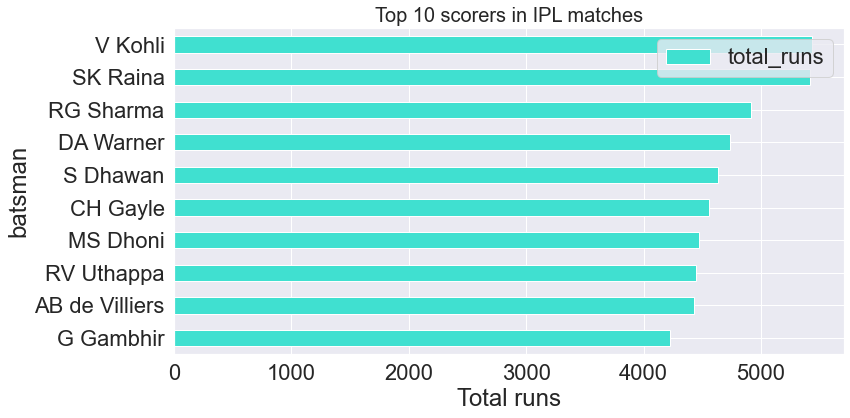

In [20]:
view1=view1[['total_runs']].sort_values(by='total_runs', ascending=False).head(10)
view1.iloc[::-1].plot(kind='barh', figsize=(12,6), color=['turquoise','blue'])
plt.title('Top 10 scorers in IPL matches', {'fontsize':20})
plt.xlabel('Total runs')

## Fastest 50 scorers

In [21]:
df2=df.groupby(['match_id', 'batsman'])['total_runs'].agg(['sum', 'count']).reset_index()
df3=df2[(df2['sum']>=50) & (df2['sum']<60)]
df3.loc[:,'cal']=df3['sum']/df3['count']
df3=df3.sort_values(by='cal', ascending=False)
fastest_50_per_match=df3.groupby(['match_id', 'batsman'])['cal'].max().reset_index().drop('cal', axis=1)


Text(0.5, 0, "Count of fastest 50's")

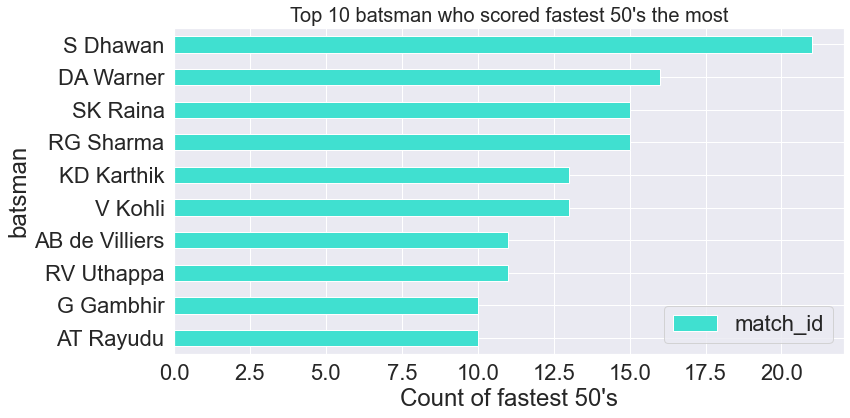

In [22]:
view=fastest_50_per_match.groupby('batsman').count().sort_values(by='match_id',ascending=False).head(10)
view.iloc[::-1].plot(kind='barh', figsize=(12,6), color=['turquoise','blue'])
plt.title("Top 10 batsman who scored fastest 50's the most", {'fontsize':20})
plt.xlabel("Count of fastest 50's")

## Fastest 100 scorers


In [23]:
df2=df.groupby(['match_id', 'batsman'])['total_runs'].agg(['sum', 'count']).reset_index()
df3=df2[(df2['sum']>=50)]
df3.loc[:,'cal']=df3['sum']/df3['count']
df3=df3.sort_values(by='cal', ascending=False)
df3=df3[(df3['cal']>=2)]
fastest_100_per_match=df3.groupby(['match_id', 'batsman'])['cal'].max().reset_index().drop('cal', axis=1)

Text(0.5, 0, "Count of fastest 100's")

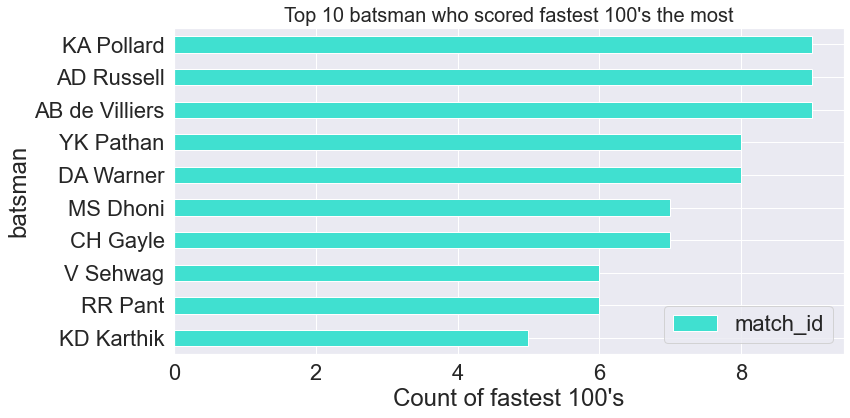

In [24]:
view=fastest_100_per_match.groupby('batsman').count().sort_values(by='match_id',ascending=False).head(10)
view.iloc[::-1].plot(kind='barh', figsize=(12,6), color=['turquoise','blue'])
plt.title("Top 10 batsman who scored fastest 100's the most", {'fontsize':20})
plt.xlabel("Count of fastest 100's")


# Players performance - wickets


In [25]:
df1=df[['bowler','match_id','dismissal_kind']].groupby(['match_id','bowler']).count().reset_index()
df1

,match_id,bowler,dismissal_kind
0,1,A Choudhary,1
1,1,A Nehra,2
2,1,B Kumar,2
3,1,BCJ Cutting,1
4,1,Bipul Sharma,1
...,...,...,...
8972,11415,MJ McClenaghan,0
8973,11415,RA Jadeja,0
8974,11415,RD Chahar,1
8975,11415,SL Malinga,2


In [26]:
df1=df[['bowler','match_id','dismissal_kind']].groupby(['match_id','bowler']).count().reset_index()
view=df1[['bowler', 'dismissal_kind']].groupby('bowler').sum().rename(columns={'dismissal_kind': 'total_wickets'}).join(df1[['bowler', 'dismissal_kind']].groupby('bowler').mean().rename(columns={'dismissal_kind': 'mean_wickets'}))

Text(0.5, 0, 'No. of wickets')

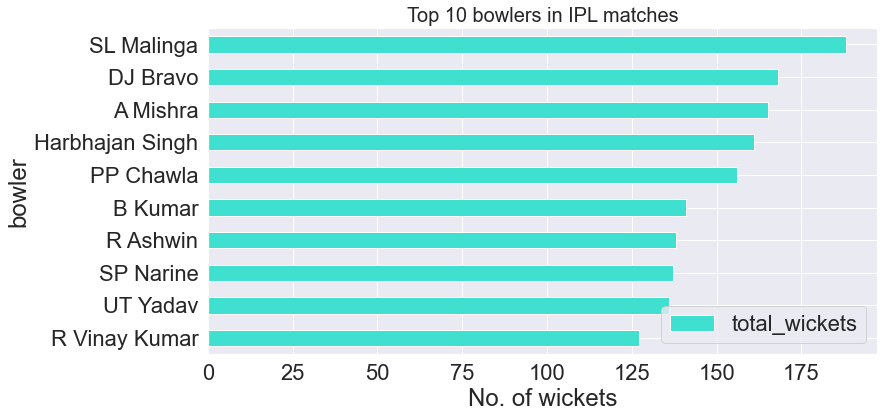

In [27]:
view1=view[['total_wickets']].sort_values(by='total_wickets', ascending=False).head(10)
view1.iloc[::-1].plot(kind='barh', figsize=(12,6), color=['turquoise','blue'])
plt.title('Top 10 bowlers in IPL matches', {'fontsize':20})
plt.xlabel('No. of wickets')

# How many 4's and 6's did each player strike?

In [28]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [29]:
batsman=list(df.groupby(['batsman'])['total_runs'].sum().sort_values(ascending=False).head(5).index)

In [30]:
df3=df.groupby([ 'batsman','total_runs'])['total_runs'].count()

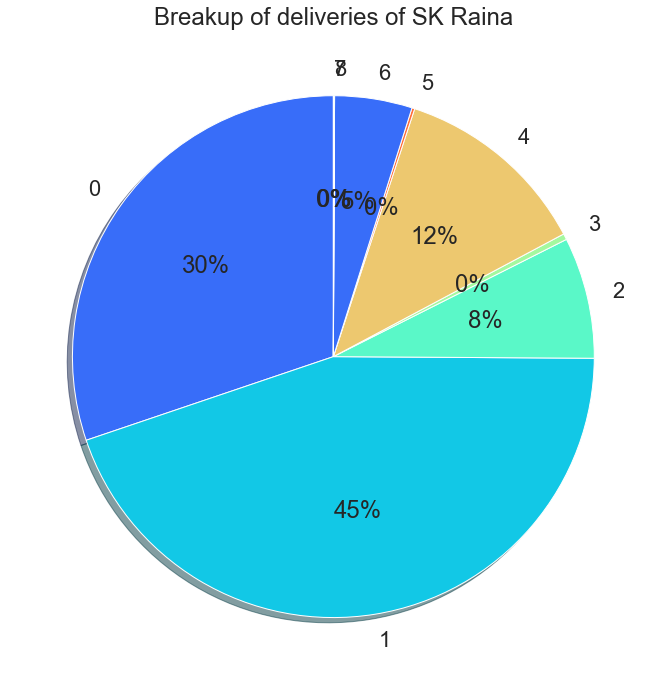

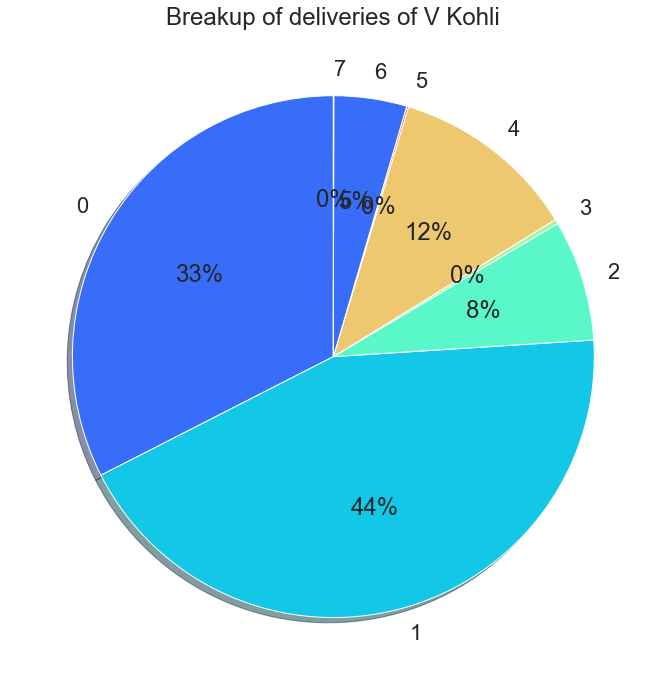

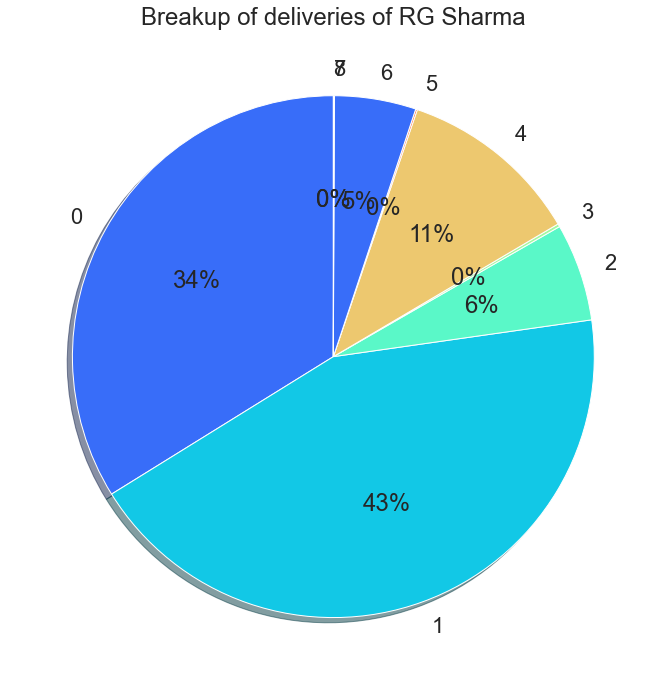

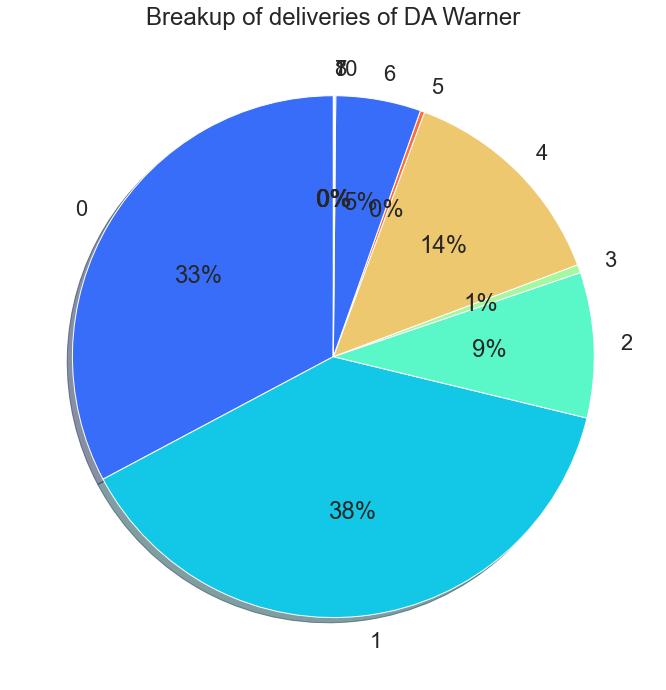

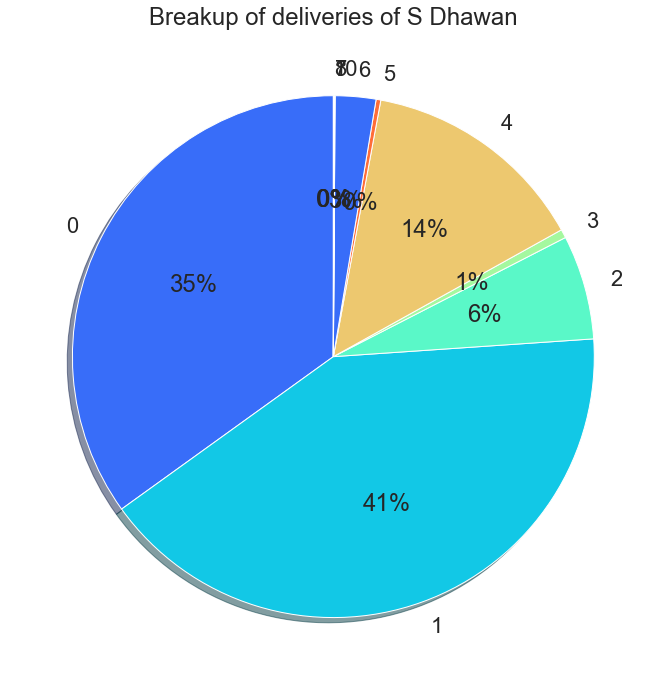

In [31]:
for name in batsman:
    labels=df3.loc[name].index
    fig = plt.figure(figsize =(12, 12))
    plt.pie(df3.loc[name], labels=labels, shadow=True, startangle=90, autopct='%.0f%%' )
    #plt.legend()
    plt.title('Breakup of deliveries of'+' '+name)
  

# Season -wise Average Runs of each IPL team

In [36]:
df1=matches.groupby(['winner', 'season'])['Total_runs'].mean()
df1=df1.reset_index()
seasons=list(df1['season'].unique())
colors={2008:'blue',2009:'green', 2010:'brown',2011:'orange',2012:'brown', 2013:'pink', 2014:'purple', 2015:'lime', 2016:'gold', 2017:'tomato', 2018:'darkblue', 2019:'cyan'}


In [37]:
def plot_season(year):
    df2=df1[df1['season']==year]
    plt.figure(figsize=(11,8))
    plt.scatter( df2['Total_runs'],df2['winner'],c=colors[year], s=100)
    plt.title('Season' + ' '+ str(year) + ' ' + 'Average runs')
    plt.xlabel('Average Runs')
    

In [38]:
from ipywidgets import interact, widgets

interact(plot_season, year=range(2008, 2019,1))

interactive(children=(Dropdown(description='year', options=(2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 20…

<function __main__.plot_season(year)>

In [39]:
interact(plot_season, year=widgets.IntSlider(min=2008, max=2019, step=1))

interactive(children=(IntSlider(value=2008, description='year', max=2019, min=2008), Output()), _dom_classes=(…

<function __main__.plot_season(year)>